### Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# membagi dataset menjadi data training, validation n testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

### Load Data

In [ ]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data tersebut tentang prediksi harga rumah (medv) di kota Boston, fitur:
1. Criminal rate (crim)
2. Residential land zoned proportion (zn)
3. Non-retail business acres proportion (indus)
4. Is bounds with river (chas)
5. Nitrogen oxides concentration (nox)
6. Number rooms average (rm)
7. Owner age proportion (age)
8. Weighted distance to cities (dis)
9. Accessibility index (rad)
10. Tax rate (tax)
11. Pupil-teacher ratio (ptratio)
12. Black proportion (black)
13. Percent lower status (lstat)

### Split Data

In [ ]:
# feature berupa semua kolom kecuali kolom medv karena medv merupakan target yang akan kita prediski
feature = boston.drop(columns='medv')
target = boston[['medv']]

In [ ]:
# First splitting: pretrain and test
# dataset akan di bagi menjadi pretrain (80%) dan test (20%)
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
# kemudian dataset pretrain(80%) akan dibagi lagi menjadi train(80% dari data pretrain) dan validation (20% dari data pretrain)
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

### Chech VIF Score

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


### Correlation Plot

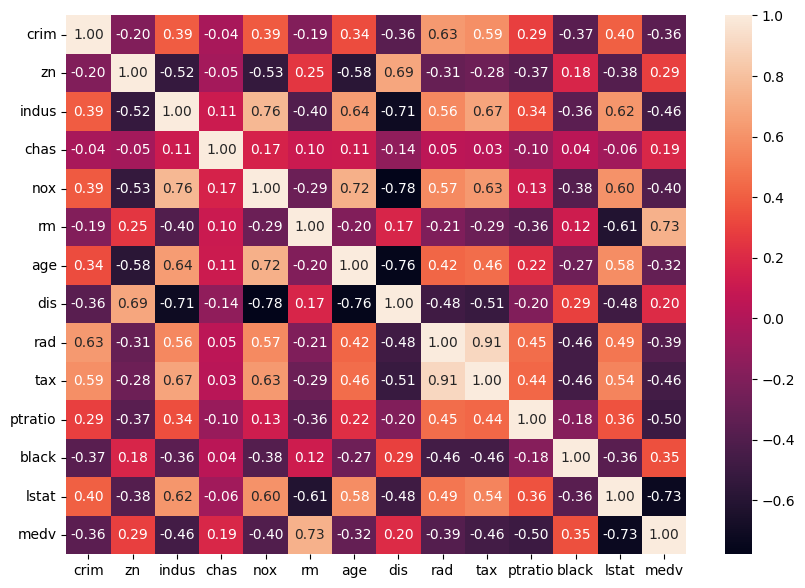

In [ ]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Saya akan menghapus fitur 'rad' karena berkorelasi tinggi dengan 'tax'. selain itu, saya akan drop feature nox dan dis yang dapat menyebabkan multikolinearitas. Multikolinearitas terjadi ketika dua fitur independen berkorelasi kuat, sehingga membuat model regresi menjadi tidak stabil dan sulit diinterpretasi.

### Drop Multicollinear Features

In [ ]:
# Menghapus feature rad disetiap dataset
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

In [ ]:
# Menghapus feature nox disetiap dataset
feature_boston_train = feature_boston_train.drop(columns=['nox'])
feature_boston_validation = feature_boston_validation.drop(columns=['nox'])
feature_boston_test = feature_boston_test.drop(columns=['nox'])

In [ ]:
# Menghapus feature dis disetiap dataset
feature_boston_train = feature_boston_train.drop(columns=['dis'])
feature_boston_validation = feature_boston_validation.drop(columns=['dis'])
feature_boston_test = feature_boston_test.drop(columns=['dis'])

### Recheck VIF Score

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.596586
2,zn,1.832693
3,indus,2.970810
4,chas,1.078919
5,rm,1.891979
6,age,2.491050
7,tax,2.827854
8,ptratio,1.480472
9,black,1.346511
10,lstat,2.935815


### Train the Model

##### Ridge Regression

In [ ]:
# train the model
X_boston_train = feature_boston_train.to_numpy() # mengubah ke array
y_boston_train = target_boston_train.to_numpy() # mengubah ke array
y_boston_train = y_boston_train.reshape(len(y_boston_train),) # mengubah array ke 1 dimensi

In [ ]:
# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)


In [ ]:
# fit the model (training)
# Melatih model dengan data train untuk mempelajari hubungan antara fitur dan variabel target (medv)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

#### Find the best model (alpha)
Based on validation set

In [ ]:
X_boston_validation = feature_boston_validation.to_numpy() # mengubaha data validation ke array
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),) # Mengubah array menjadi bentuk 1 dimensi agar sesuai dengan format yang diharapkan oleh model scikit-learn.

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642037
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419683
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042946
RMSE of Ridge regression model with alpha = 10 is 5.051662075103159


In [ ]:
ridge_best = ridge_reg_ten

coef_boston = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_boston

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


Interpretasi Koefisien Ridge:

1. intercept (7.068423): Ini adalah nilai dasar/baseline ketika semua variabel independen bernilai 0.

2. Faktor-faktor yang memiliki pengaruh positif terhadap variabel dependen:
- chas (2.061822): Lokasi yang dekat dengan Charles River meningkatkan nilai sebesar 2.06 unit
- rm (5.041802): Setiap kenaikan 1 unit rata-rata jumlah kamar meningkatkan nilai sebesar 5.04 unit
- indus (0.034094): Kenaikan 1 unit proporsi bisnis non-retail meningkatkan nilai sebesar 0.03 unit
- age (0.020313): Kenaikan 1 unit usia properti meningkatkan nilai sebesar 0.02 unit
- black (0.012919): Kenaikan 1 unit proporsi penduduk kulit hitam meningkatkan nilai sebesar 0.01 unit

3. Faktor-faktor yang memiliki pengaruh negatif:
- crim (-0.052216): Setiap kenaikan 1 unit tingkat kriminalitas menurunkan nilai sebesar 0.05 unit
- zn (-0.007855): Kenaikan 1 unit proporsi lahan untuk lot besar menurunkan nilai sebesar 0.008 unit
- tax (-0.000312): Kenaikan 1 unit tingkat pajak properti menurunkan nilai sebesar 0.0003 unit
- ptratio (-0.845843): Kenaikan 1 unit rasio murid-guru menurunkan nilai sebesar 0.85 unit
- lstat (-0.540915): Kenaikan 1 unit persentase populasi status rendah menurunkan nilai sebesar 0.54 unit

Variabel yang memiliki pengaruh terbesar adalah:
1. rm (+5.04)
2. chas (+2.06)
3. ptratio (-0.85)
4. lstat (-0.54)

#### Lasso Regression

In [ ]:
# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

In [ ]:
# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

In [ ]:
# fit the model (training)
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

#### Find the best model (alpha)
Based on validation set

In [ ]:
X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

In [ ]:
alphas = [0.01, 0.1, 1.0, 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.08016984806439
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786157
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


In [ ]:
# coeffs
lasso_best = lasso_reg_one

coef_boiston = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_boston

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


Interpretasi Koefisien Lasso:

1. intercept (7.068423): Ini adalah nilai dasar/baseline ketika semua variabel independen bernilai 0.

2. Interpretasi koefisien yang memiliki pengaruh positif:
- rm (5.041802): Variabel terpenting, setiap kenaikan rata-rata jumlah kamar meningkatkan nilai sebesar 5.04 unit
- chas (2.061822): Lokasi dekat Charles River meningkatkan nilai sebesar 2.06 unit
- indus (0.034094): Pengaruh kecil, kenaikan proporsi bisnis non-retail meningkatkan nilai 0.03 unit
- age (0.020313): Pengaruh sangat kecil dari usia properti
- black (0.012919): Pengaruh sangat kecil dari proporsi penduduk kulit hitam

3. Interpretasi koefisien yang memiliki pengaruh negatif:
- ptratio (-0.845843): Pengaruh negatif terbesar, peningkatan rasio murid-guru menurunkan nilai
- lstat (-0.540915): Pengaruh negatif kedua terbesar dari persentase populasi status rendah
- crim (-0.052216): Pengaruh negatif moderat dari tingkat kriminalitas
- zn (-0.007855): Pengaruh negatif kecil dari proporsi lahan untuk lot besar
- tax (-0.000312): Pengaruh negatif sangat kecil dari tingkat pajak


Variabel yang memiliki pengaruh terbesar adalah:
1. rm (+5.04)
2. chas (+2.06)
3. ptratio (-0.85)
4. lstat (-0.54)

**Model Lasso Regression dengan alpha = 1.0 memiliki RMSE sebesar 4.9883, sedangkan model Ridge Regression dengan alpha = 10 memiliki RMSE sebesar 5.0517. Dengan demikian, model Lasso Regression dengan alpha = 1.0 sedikit lebih baik daripada Ridge Regression karena RMSE-nya lebih rendah.**

### Diagnostic Study

In [ ]:
y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.6908222586747164


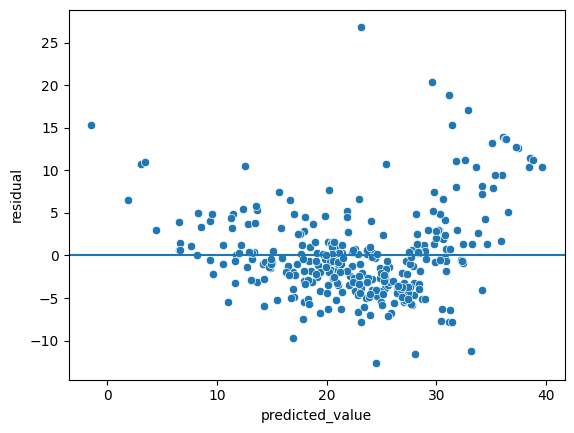

In [ ]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
boston_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=boston_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: Rather Ok, plot residual tidak membentuk pola melengkung yang jelas, tetapi ada beberapa titik di bagian kiri dan kanan yang sedikit menyebar. Secara umum, ini menunjukkan bahwa model cukup baik menangkap hubungan linear
2. Variance stable: No, plot residual menunjukkan beberapa penyebaran residual yang tidak konsisten, terutama di nilai prediksi yang lebih tinggi (di atas 30).
3. Independent residual: Rather Ok, tidak ada pola yang jelas atau tren yang menunjukkan ketergantungan antar residual.

### Model Evaluation

Lasso

#### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_boston_train)

In [ ]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 5.299257784164325
MAE for training data is 3.815568478973893
MAPE for training data is 0.18015928311790003


#### Testing Error

In [ ]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [ ]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.315646725734099
MAE for testing data is 3.535684907677296
MAPE for testing data is 0.18439385451147544


Hasil Evaluasi Model:

Data Training:
- RMSE: 5.2993
- MAE: 3.8156
- MAPE: 18.02%

Data Testing:
- RMSE: 5.3156
- MAE: 3.5357
- MAPE: 18.44%


1. RMSE (Root Mean Squared Error) untuk data testing adalah 5.32. Karena RMSE memberikan penalti lebih besar pada kesalahan yang lebih besar (karena pengkuadratan), nilai ini sedikit lebih tinggi dari MAE. Ini menunjukkan adanya beberapa prediksi dengan kesalahan yang cukup signifikan
2. MAE (Mean Absolute Error) untuk data testing adalah 3.54, yang berarti rata-rata kesalahan prediksi model adalah sekitar 3.54 unit dari nilai aktual. Nilai ini menunjukkan seberapa jauh prediksi model dari nilai aktual tanpa memperhitungkan arah kesalahan (positif atau negatif).
3. MAPE (Mean Absolute Percentage Error) sekitar 18% untuk data training dan testing menunjukkan bahwa, rata-rata, prediksi model memiliki kesalahan sekitar 18% dari nilai aktual. MAPE di bawah 20% umumnya dianggap memiliki tingkat akurasi yang cukup baik dalam konteks regresi.
4. Nilai RMSE dan MAE untuk data training dan testing sangat mirip, yang menunjukkan bahwa model memiliki generalizability yang baik dan tidak mengalami overfitting. Perbedaan yang sangat kecil antara performa training dan testing menunjukkan bahwa model stabil ketika diterapkan pada data baru.